# IS 362 – Week 8 Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Here below is the website where the files for the data originated.

Source Code: https://archive.ics.uci.edu/dataset/9/auto+mpg

## Reading and Importing the Files

These blocks of code here are used to view the files and read what is in them. The one below is to view the data in a DataFrame. The **'header=None'** statement avoids making the first row the header in the file.

In [2]:
automobile = pd.read_fwf('auto-mpg.data', header=None)
automobile

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


This code block is done to read the description file about the database. Here, on "Attribute Information", the names for the columns can be viewed.

In [3]:
names = open('auto-mpg.names', 'r')
names.readlines()

['1. Title: Auto-Mpg Data\n',
 '\n',
 '2. Sources:\n',
 '   (a) Origin:  This dataset was taken from the StatLib library which is\n',
 '                maintained at Carnegie Mellon University. The dataset was \n',
 '                used in the 1983 American Statistical Association Exposition.\n',
 '   (c) Date: July 7, 1993\n',
 '\n',
 '3. Past Usage:\n',
 '    -  See 2b (above)\n',
 '    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.\n',
 '       In Proceedings on the Tenth International Conference of Machine \n',
 '       Learning, 236-243, University of Massachusetts, Amherst. Morgan\n',
 '       Kaufmann.\n',
 '\n',
 '4. Relevant Information:\n',
 '\n',
 '   This dataset is a slightly modified version of the dataset provided in\n',
 '   the StatLib library.  In line with the use by Ross Quinlan (1993) in\n',
 '   predicting the attribute "mpg", 8 of the original instances were removed \n',
 '   because they had unknown values for the "mpg" attribute.  The

### Fixing the DataFrame

The code block below shows the process of adding the column names to the DataFrame.

The block below shows a complete DataFrame with appropriately titled column headers for the classes, while also retaining all of the original data and shifting the original column header row downward to be part of the data. The object "columns" is the proper column headers or series of values in each column, as listed in the ".names" file.

In [4]:
columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

automobile.columns = columns
automobile

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


I soon discovered that the Horsepower values are float values, so I had to convert them to integers.

## Fixing the 'Horsepower' Values

**Prompt**: Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

In [5]:
automobile[automobile['Horsepower'] == '?']

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


When replacing the '?' with None in an attempt to get null values, the '?' values in Horsepower are randomized to reasonable values in comparison with the rest of the data. 

However, using **np.nan** will give me the null values as intended.

The cell below replaces them and checks for the Horsepower values in some of the rows.

In [6]:
automobile['Horsepower'].replace('?', np.nan, inplace=True) # The 'inplace=True' statement locks in the changes
print(automobile.loc[32])
print(automobile.loc[126])

MPG                     25.0
Cylinders                  4
Displacement            98.0
Horsepower               NaN
Weight                2046.0
Acceleration            19.0
Model Year                71
Origin                     1
Car Name        "ford pinto"
Name: 32, dtype: object
MPG                        21.0
Cylinders                     6
Displacement              200.0
Horsepower                  NaN
Weight                   2875.0
Acceleration               17.0
Model Year                   74
Origin                        1
Car Name        "ford maverick"
Name: 126, dtype: object


This checks whether the '?' values have been replaced with null values.

In [7]:
automobile[automobile['Horsepower'].isnull()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,"""amc concord dl"""


In [8]:
automobile['Horsepower'].max() # My attempt to check for the maximum value in the column, 
                               # only to learn that all the objects in the series are float objects, not integers.

TypeError: '>=' not supported between instances of 'str' and 'float'

In [9]:
automobile['Horsepower'] = automobile['Horsepower'].astype(int) 
# My attempt at turning the values into integers, still does not work

ValueError: invalid literal for int() with base 10: '130.0'

## Fixing the 'Origin' Values

The code block below has a function that respectively replaces/converts the 'Origin' class values from '1','2','3' to 'USA', 'Asia', 'Europe.'

In [10]:
automobile['Origin'].replace([1, 2, 3], ['USA', 'Asia', 'Europe'], inplace=True)
automobile

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,USA,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,Asia,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,USA,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,USA,"""ford ranger"""


This next code block was done out of curiosity, it's largely irrelevant to the assignment. So it can be ignored.

In [11]:
automobile['Origin'].value_counts()

USA       249
Europe     79
Asia       70
Name: Origin, dtype: int64

## DIstribution for Cylinders

In [12]:
cylinder = automobile['Cylinders'].value_counts()
cylinder_count = pd.DataFrame(cylinder)
cylinder_count

,Cylinders
4,204
8,103
6,84
3,4
5,3


<AxesSubplot:title={'center':'Number of Cylinders in a Vehicle'}, xlabel='Cylinders', ylabel='Vehicles'>

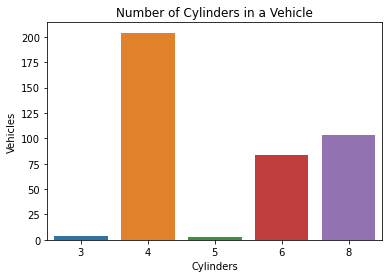

In [13]:
cylinders_per_vehicle = sns.barplot(x=cylinder_count.index, y=cylinder_count['Cylinders'], data=cylinder_count);
# The ax.set function in seaborn will rename the axes and the title of the barplot
cylinders_per_vehicle.set(xlabel='Cylinders',
                          ylabel='Vehicles',
                          title='Number of Cylinders in a Vehicle')
cylinders_per_vehicle

## Relationship Between Horsepower and Weight

In [15]:
automobile.max() # All the values are for every series except horsepower.

<ipython-input-15-455a6bc3ba51>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  automobile.max()


MPG                    46.6
Cylinders                 8
Displacement          455.0
Weight               5140.0
Acceleration           24.8
Model Year               82
Origin                  USA
Car Name        "vw rabbit"
dtype: object

<AxesSubplot:xlabel='Horsepower', ylabel='Weight'>

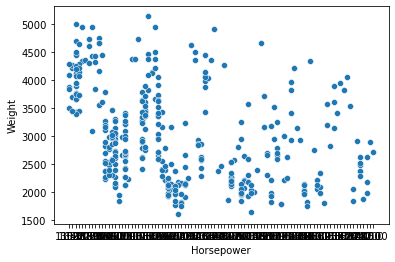

In [14]:
correlation = sns.scatterplot(x=automobile['Horsepower'], y=automobile['Weight']);
correlation
# This is where I noticed something was off about horsepower